## Визуализация, k-NN регрессия, кросс-валидация.

В этом задании мы рассмотрим задачу прогнозирования количества взятых в аренду велосипедов.

Файл [bike_sharing.csv](https://yadi.sk/d/n8iy_trO3EsUBa) содержит данные о 731 дне работы сервиса по аренде велосипедов. Про каждый день известны:

* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius from 0 to 100.
- atemp: Normalized feeling temperature in Celsius from 0 to 100.
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

**1. (0.25 балла)** Откройте файл bike_sharing.csv, запишите в датафрейм df и выведите первые пять строк датафрейма.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('bike_sharing.csv')
print(df.head())

   Unnamed: 0  instant      dteday  season  yr  mnth  holiday  weekday  \
0           0        1  2011-01-01       1   0     1        0        6   
1           1        2  2011-01-02       1   0     1        0        0   
2           2        3  2011-01-03       1   0     1        0        1   
3           3        4  2011-01-04       1   0     1        0        2   
4           4        5  2011-01-05       1   0     1        0        3   

   workingday  weathersit     temp    atemp       hum  windspeed  casual  \
0           0           2  34.4167  36.3625  0.805833   0.160446     331   
1           0           2  36.3478  35.3739  0.696087   0.248539     131   
2           1           1  19.6364  18.9405  0.437273   0.248309     120   
3           1           1  20.0000  21.2122  0.590435   0.160296     108   
4           1           1  22.6957  22.9270  0.436957   0.186900      82   

   registered   cnt  
0         654   985  
1         670   801  
2        1229  1349  
3        1

**2. (1 балл)** Постройте график среднего числа арендованных байков (cnt) по каждому месяцу. Не забудьте подписать оси координат. Убедитесь, что в летние месяцы велосипеды в прокат берут чаще.

In [3]:
av = []
for i in range(1, 13):
    av.append(np.mean(df.cnt[df.mnth == i]))
x = np.arange(1,13)
y = av


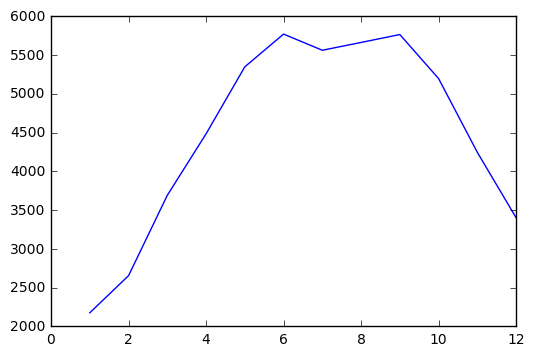

In [4]:
plt.plot(x,y)

** 3. (0.5 балла)** Постройте диаграмму рассеяния (scatter plot) с осями cnt и atemp, где точки — это объекты. Какой логичный вывод можно сделать по этому графику?

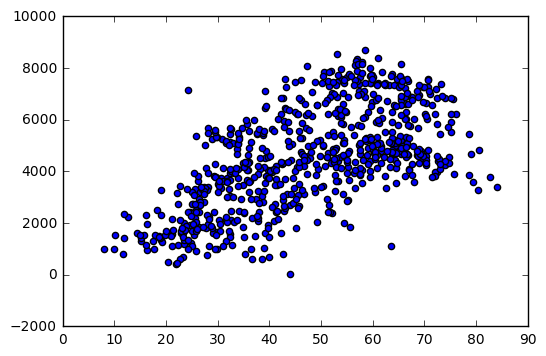

In [5]:
plt.scatter(df['atemp'],df['cnt'])

**4. (0.5 балла)** Преобразуйте небинарные категориальные признаки с помощью one-hot кодирования. Сделать это можно с помощью функции pd.get_dummies, указав нужные столбцы в параметре columns. Сколько признаков получилось после кодирования? И какой категориальный признак породил больше всего бинарных?

In [6]:
one_hot = []
amount = []

columns = ['season','mnth','weekday','weathersit']
for i in columns:
    one_hot.append(np.array(pd.get_dummies(df[i])))
    
for i in range(4):
    amount.append(len(one_hot[i][0]))
     
print(max(amount))    
    
                  

12


**5. (0.25 балла)** Удалите столбцы instant, dteday, casual и registered. Предположите, почему мы удаляем эти признаки.

In [7]:
df.drop(labels=['instant','dteday','casual','registered'],inplace=True, axis=1)
#удаляем так как данные признаки - лишняя информация и из-за них возникает мультиколлинеарность

**6. (0.5 балла)** Далее нашей целевой переменной будет количество арендованных велосипедов (cnt). Поэтому запишите cnt в переменную df_ans и удалите из df. Затем в помощью функции train_test_split из sklearn.model_selection разделите выборку на обучающую и контрольную в отношении 7 к 3, создав переменные X_train, X_test, y_train, y_test.

Замечание 1: установите random_seed, чтобы генератор псевдослучайных чисел работал всегда одинаково.

Замечание 2: если в sklearn.model_selection нет функции train_test_split, обновите scikit-learn.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_ans = df['cnt']
df.drop(labels=['cnt'],inplace=True,axis=1)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(df,df_ans,test_size = 0.3,random_state = 123)

**7. (1 балл)** Обучите алгоритм пяти ближайших соседей с евклидовой метрикой и оцените MAE на контрольной выборке.

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [14]:
knn = KNeighborsRegressor(n_neighbors = 5, weights = 'uniform' , metric='euclidean')
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
mean_absolute_error(y_test,y_hat)

631.88818181818181

**8. (0.5 балла)** Постройте диаграмму рассеяния (scatter plot), по одной оси отметив настоящее число аренд велосипедов, а по другой — предсказанное алгоритмом. Дополнительно на этом графике постройте прямую $y = x$. Чему соотстветствует отклонение от этой прямой?

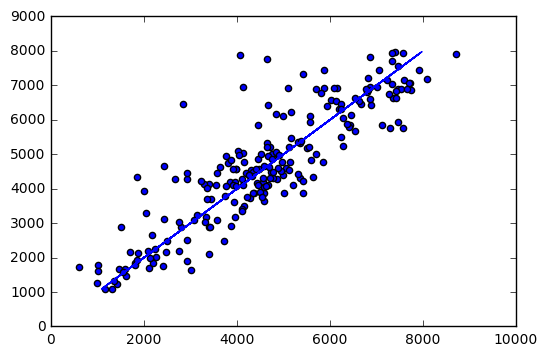

In [15]:
plt.scatter(y_test,y_hat)
plt.plot(y_hat,y_hat)

**9. (1 балл)** Отмасштабируйте признаки, чтобы они принимали значения на $[0, 1]$.

Это можно сделать собственноручно с помощью операций pandas.

Иначе — можно использовать MinMaxScaler из sklearn.preprocessing — класс с методами fit и transform. 
Для этого:

* либо соедините X_train и X_test обратно в единый датафрейм, отмасштабируйте и разъедините обратно,
* либо отмасштабируйте df (без ответов) и разделите на обучающую и контрольную выборку, используя тот же random_seed.

На выходе метода transform получится numpy-массив, который нужно будет превратить обратно в датафрейм.

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaler.fit(df)
df1 = scaler.transform(df)
df = pd.DataFrame(df1,columns=['unnamed','season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed'])





In [18]:
X_train,X_test,y_train,y_test = train_test_split(df,df_ans,test_size = 0.3,random_state = 123)

**10. (0.5 балла)** Вновь обучите алгоритм пяти ближайших соседей с евклидовой метрикой и оцените MAE на контрольной выборке. Почему качество поменялось?

In [19]:
knn.fit(X_train,y_train)
y_hat2 = knn.predict(X_test)
mean_absolute_error(y_hat2,y_test)

588.27999999999986

**11. (1.25 балла)** Используя класс KFold из sklearn.model_selection установите с помощью кросс-валидации на пяти фолдах, какой параметр weights лучше с точки зрения mean absolute error. 

In [20]:
from sklearn.model_selection import KFold

In [21]:
kf = KFold(n_splits=5)
metric_uniform = []
metric_distance = []

X = df1
y_arr = np.array(df_ans)
y = y_arr.reshape(731,1)

knn_u = KNeighborsRegressor(n_neighbors=5,weights='uniform',metric='euclidean')
knn_d = KNeighborsRegressor(n_neighbors=5,weights='distance',metric='euclidean')

for train,test in kf.split(X):
    X_train,X_test,y_train,y_test = X[train],X[test],y[train],y[test]
     
    knn_u.fit(X_train,y_train)
    y_hat = knn_u.predict(X_test)
    metric_uniform.append(mean_absolute_error(y_hat,y_test))

    knn_d.fit(X_train,y_train)
    y_hat = knn_d.predict(X_test)
    metric_distance.append(mean_absolute_error(y_hat,y_test))


    
print('Uniform', min(metric_uniform))
print('Distance', min(metric_distance))

    

Uniform 588.842465753
Distance 570.950714011


**12. (2.5 балла)** С помощью GridSearchCV из sklearn.model_selection на пяти фолдах выберите лучшее значение $k$ от 1 до 50. Постройте график MAE на кросс-валидации в зависимости от $k$. 

Замечание: Передать нужную метрику качества для GridSearchCV можно через параметр scoring, но не всё так просто. Из метрики качества нужно сделать «scorer» c помощью функции sklearn.metrics.make_scorer, не забыв указать нужное значение greater_is_better.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [23]:
k = np.arange(1,51)
knn = KNeighborsRegressor(weights='distance', metric = 'euclidean')
kf = KFold(n_splits=5, shuffle=True, random_state=123)
y_arr = np.array(df_ans)
y = y_arr.reshape(731,1)

GS = GridSearchCV(estimator=knn,param_grid=dict(n_neighbors = k),scoring=make_scorer(mean_absolute_error,greater_is_better=False),cv=kf)


for train,test in kf.split(X):
    X_train,X_test,y_train,y_test = X[train],X[test],y[train],y[test]
    GS.fit(X_train,y_train)
    y_hat = GS.predict(X_test)
    
print(GS.best_params_)


    
                                                                                  
                                                                                  
                                                                    

{'n_neighbors': 7}


In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
cv_res = GS.cv_results_
test_scores = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']


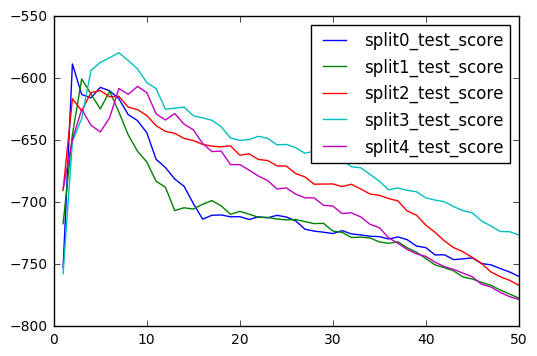

In [26]:
for i in test_scores:
    plt.plot(k,cv_res[i],label = i)
plt.legend()

**13. (0.25 балла)** Посчитайте качество итоговой модели на контрольной выборке. 

In [27]:
mean_absolute_error(y_hat,y_test)

617.3116470570277